In [ ]:
!pip install little_mallet_wrapper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import little_mallet_wrapper
import seaborn
import glob
from pathlib import Path
import pandas as pd

In [ ]:
# upload male and female corpora

import zipfile
from google.colab import files

uploaded = files.upload()

Saving results.zip to results.zip


In [ ]:
path_to_zip_file = list(uploaded.keys())[0]

print ('Extracting',path_to_zip_file)

with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
  zip_ref.extractall('.')

print()
print('Here is a directory listing (you should see a directory with your corpus):')
!ls -l

Extracting results.zip

Here is a directory listing (you should see a directory with your corpus):
total 214424
drwxr-xr-x 3 root root      4096 Apr 30 16:26 __MACOSX
drwxr-xr-x 4 root root      4096 Apr 30 16:26 results
-rw-r--r-- 1 root root 219555712 Apr 30 15:39 results.zip
drwxr-xr-x 1 root root      4096 Apr 27 13:35 sample_data


In [ ]:
uploaded = files.upload()

Saving data_refined.zip to data_refined.zip


In [ ]:
path_to_zip_file = list(uploaded.keys())[0]

print ('Extracting',path_to_zip_file)

with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
  zip_ref.extractall('.')

print()
print('Here is a directory listing (you should see a directory with your corpus):')
!ls -l

Extracting data_refined.zip

Here is a directory listing (you should see a directory with your corpus):
total 338748
drwxr-xr-x 4 root root      4096 Apr 30 16:45 data_refined
-rw-r--r-- 1 root root 127303193 Apr 30 16:45 data_refined.zip
drwxr-xr-x 4 root root      4096 Apr 30 16:45 __MACOSX
drwxr-xr-x 4 root root      4096 Apr 30 16:26 results
-rw-r--r-- 1 root root 219555712 Apr 30 15:39 results.zip
drwxr-xr-x 1 root root      4096 Apr 27 13:35 sample_data


In [ ]:
import numpy as np

In [ ]:
num_topics = 15

In [ ]:
weights_path_female = f"results/female/mallet.topic_weights.{num_topics}"
word_dists_female = little_mallet_wrapper.load_topic_word_distributions(weights_path_female)

In [ ]:
labels = []
for i in range(num_topics):
  labels.append(str(i))
words = []
word_probs = []
for topic in word_dists_female:
  word_to_prob = word_dists_female[topic]
  temp_word = []
  temp = []
  for word in word_to_prob:
    prob = word_to_prob[word]
    temp_word.append(word)
    temp.append(prob)
  word_probs.append(temp)
  words.append(temp_word)

In [ ]:
files = glob.glob(f"data_refined/female/*.txt")
novel_titles_female = [Path(file).stem for file in files]

path_to_topic_distributions_female = f"results/female/mallet.topic_distributions.{str(num_topics)}"
topic_distributions_female = little_mallet_wrapper.load_topic_distributions(path_to_topic_distributions_female)

path_to_topic_keys_female = f"results/female/mallet.topic_keys.{str(num_topics)}"
topics_female = little_mallet_wrapper.load_topic_keys(path_to_topic_keys_female)

for topic_number, topic in enumerate(topics_female):
    print(f"Topic {topic_number}: {topic}")

Topic 0: ['lady', 'mother', 'one', 'poor', 'thou', 'good', 'queen', 'sir', 'honor', 'mona', 'dorothy', 'little', 'dick', 'lorraine', 'see', 'child', 'stephen', 'must', 'aut', 'young']
Topic 1: ['sir', 'philip', 'lady', 'face', 'vera', 'know', 'see', 'little', 'one', 'room', 'come', 'stella', 'say', 'madge', 'old', 'erica', 'dear', 'answered', 'tell', 'man']
Topic 2: ['one', 'eyes', 'love', 'upon', 'face', 'like', 'life', 'heart', 'yet', 'seemed', 'little', 'hand', 'still', 'man', 'voice', 'long', 'words', 'woman', 'away', 'night']
Topic 3: ['alessandro', 'father', 'one', 'never', 'ramona', 'glen', 'house', 'denys', 'nan', 'day', 'come', 'little', 'old', 'judith', 'poor', 'came', 'phillis', 'good', 'felipe', 'dick']
Topic 4: ['lady', 'eve', 'muriel', 'iris', 'sir', 'adam', 'wentworth', 'esse', 'stasie', 'mother', 'fenella', 'miss', 'joan', 'jerry', 'arthur', 'lord', 'upon', 'william', 'harding', 'tell']
Topic 5: ['know', 'one', 'little', 'think', 'see', 'mrs', 'never', 'must', 'thought'

In [ ]:
files = glob.glob(f"data_refined/male/*.txt")
novel_titles_male = [Path(file).stem for file in files]

path_to_topic_distributions_male = f"results/male/mallet.topic_distributions.{str(num_topics)}"
topic_distributions_male = little_mallet_wrapper.load_topic_distributions(path_to_topic_distributions_male)

path_to_topic_keys_male = f"results/male/mallet.topic_keys.{str(num_topics)}"
topics_male = little_mallet_wrapper.load_topic_keys(path_to_topic_keys_male)

for topic_number, topic in enumerate(topics_male):
    print(f"Topic {topic_number}: {topic}")

Topic 0: ['one', 'know', 'think', 'well', 'much', 'say', 'good', 'see', 'little', 'like', 'must', 'mrs', 'time', 'might', 'lady', 'made', 'thought', 'never', 'miss', 'way']
Topic 1: ['upon', 'thou', 'thee', 'thy', 'king', 'man', 'horn', 'one', 'like', 'prince', 'shall', 'well', 'see', 'made', 'exclaimed', 'lord', 'father', 'master', 'house', 'inglesant']
Topic 2: ['father', 'man', 'must', 'one', 'old', 'money', 'clare', 'like', 'tom', 'know', 'mark', 'come', 'iphis', 'see', 'take', 'house', 'well', 'mother', 'lapham', 'put']
Topic 3: ['sir', 'colonel', 'mary', 'lady', 'ethert', 'ivy', 'old', 'edward', 'father', 'armitage', 'bellarmin', 'saxon', 'must', 'lord', 'hilda', 'hubert', 'house', 'bramton', 'farquhar', 'jesse']
Topic 4: ['good', 'man', 'much', 'one', 'know', 'well', 'little', 'never', 'isabel', 'old', 'like', 'horse', 'time', 'quite', 'two', 'see', 'money', 'mrs', 'sir', 'madge']
Topic 5: ['ship', 'like', 'sea', 'upon', 'captain', 'one', 'though', 'water', 'boat', 'man', 'deck'

In [ ]:
num_topics = 25
files = glob.glob(f"data_refined/female/*.txt")
novel_titles_female = [Path(file).stem for file in files]

path_to_topic_distributions_female = f"results/female/mallet.topic_distributions.{str(num_topics)}"
topic_distributions_female = little_mallet_wrapper.load_topic_distributions(path_to_topic_distributions_female)

path_to_topic_keys_female = f"results/female/mallet.topic_keys.{str(num_topics)}"
topics_female = little_mallet_wrapper.load_topic_keys(path_to_topic_keys_female)

for topic_number, topic in enumerate(topics_female):
    print(f"Topic {topic_number}: {topic}")

Topic 0: ['one', 'love', 'face', 'life', 'eyes', 'know', 'must', 'see', 'woman', 'man', 'never', 'thought', 'heart', 'yet', 'little', 'think', 'voice', 'looked', 'hand', 'come']
Topic 1: ['harry', 'godfrey', 'man', 'miss', 'oliver', 'iris', 'david', 'mona', 'though', 'father', 'young', 'squire', 'uncle', 'might', 'arden', 'jack', 'like', 'william', 'reuben', 'mother']
Topic 2: ['diana', 'alessandro', 'eve', 'ramona', 'max', 'adam', 'mrs', 'violet', 'joan', 'nan', 'cecil', 'miss', 'felipe', 'phillis', 'returned', 'senora', 'dick', 'hamilton', 'thelma', 'never']
Topic 3: ['life', 'lady', 'man', 'upon', 'love', 'house', 'room', 'like', 'never', 'woman', 'wife', 'old', 'years', 'one', 'people', 'mrs', 'husband', 'must', 'good', 'world']
Topic 4: ['crown', 'cloth', 'one', 'never', 'extra', 'thought', 'always', 'like', 'world', 'svo', 'great', 'life', 'edition', 'illustrations', 'little', 'madame', 'nothing', 'post', 'illustrated', 'carlo']
Topic 5: ['cheriton', 'jeanne', 'paul', 'alvar', 'r

In [ ]:
files = glob.glob(f"data_refined/male/*.txt")
novel_titles_male = [Path(file).stem for file in files]

path_to_topic_distributions_male = f"results/male/mallet.topic_distributions.{str(num_topics)}"
topic_distributions_male = little_mallet_wrapper.load_topic_distributions(path_to_topic_distributions_male)

path_to_topic_keys_male = f"results/male/mallet.topic_keys.{str(num_topics)}"
topics_male = little_mallet_wrapper.load_topic_keys(path_to_topic_keys_male)

for topic_number, topic in enumerate(topics_male):
    print(f"Topic {topic_number}: {topic}")

Topic 0: ['charles', 'father', 'must', 'old', 'money', 'house', 'cannot', 'know', 'see', 'mother', 'mrs', 'josephine', 'miracle', 'herring', 'pier', 'cable', 'take', 'edward', 'nothing', 'joanna']
Topic 1: ['mrs', 'doctor', 'miss', 'frank', 'arnold', 'time', 'asked', 'room', 'emily', 'say', 'father', 'looked', 'left', 'letter', 'gallilee', 'first', 'way', 'warrington', 'man', 'good']
Topic 2: ['sir', 'mary', 'captain', 'young', 'miss', 'mrs', 'time', 'hac', 'lord', 'poor', 'robert', 'thought', 'replied', 'old', 'shaftoo', 'upon', 'kate', 'though', 'yet', 'roger']
Topic 3: ['prince', 'king', 'inglesant', 'lord', 'argoll', 'upon', 'men', 'people', 'man', 'city', 'colonel', 'great', 'house', 'one', 'soldiers', 'florence', 'every', 'many', 'war', 'duke']
Topic 4: ['one', 'came', 'back', 'man', 'come', 'two', 'good', 'see', 'away', 'sir', 'well', 'men', 'way', 'went', 'like', 'time', 'made', 'little', 'must', 'great']
Topic 5: ['ethert', 'ivy', 'upon', 'colonel', 'jeanne', 'lovedayay', 'ger

In [ ]:
num_topics = 35
files = glob.glob(f"data_refined/female/*.txt")
novel_titles_female = [Path(file).stem for file in files]

path_to_topic_distributions_female = f"results/female/mallet.topic_distributions.{str(num_topics)}"
topic_distributions_female = little_mallet_wrapper.load_topic_distributions(path_to_topic_distributions_female)

path_to_topic_keys_female = f"results/female/mallet.topic_keys.{str(num_topics)}"
topics_female = little_mallet_wrapper.load_topic_keys(path_to_topic_keys_female)

for topic_number, topic in enumerate(topics_female):
    print(f"Topic {topic_number}: {topic}")

Topic 0: ['eyes', 'face', 'one', 'upon', 'voice', 'hand', 'looked', 'little', 'turned', 'still', 'stood', 'man', 'young', 'back', 'away', 'words', 'head', 'hands', 'moment', 'room']
Topic 1: ['miss', 'mrs', 'young', 'father', 'man', 'sir', 'house', 'old', 'good', 'though', 'money', 'might', 'son', 'lady', 'well', 'mother', 'never', 'gentleman', 'business', 'daughter']
Topic 2: ['eve', 'jessie', 'george', 'clara', 'kate', 'adam', 'charles', 'anna', 'lady', 'joan', 'charlie', 'quite', 'nellie', 'iris', 'adela', 'ruth', 'sir', 'gilbert', 'muir', 'pynsent']
Topic 3: ['one', 'come', 'well', 'like', 'time', 'day', 'made', 'man', 'two', 'see', 'way', 'old', 'men', 'never', 'good', 'long', 'let', 'another', 'every', 'say']
Topic 4: ['erica', 'father', 'judith', 'philip', 'little', 'anna', 'wolf', 'christophe', 'lucia', 'room', 'lad', 'seemed', 'geoff', 'though', 'methuen', 'looked', 'raeburn', 'everard', 'hugh', 'enderby']
Topic 5: ['sir', 'sydney', 'james', 'selwyn', 'miss', 'charles', 'lady'

In [ ]:
files = glob.glob(f"data_refined/male/*.txt")
novel_titles_male = [Path(file).stem for file in files]

path_to_topic_distributions_male = f"results/male/mallet.topic_distributions.{str(num_topics)}"
topic_distributions_male = little_mallet_wrapper.load_topic_distributions(path_to_topic_distributions_male)

path_to_topic_keys_male = f"results/male/mallet.topic_keys.{str(num_topics)}"
topics_male = little_mallet_wrapper.load_topic_keys(path_to_topic_keys_male)

for topic_number, topic in enumerate(topics_male):
    print(f"Topic {topic_number}: {topic}")

Topic 0: ['mary', 'josephine', 'colonel', 'cable', 'lady', 'sir', 'eichard', 'lord', 'wilfred', 'athelstone', 'says', 'spilled', 'also', 'hales', 'nellie', 'house', 'miss', 'jenny', 'came', 'harrison']
Topic 1: ['know', 'see', 'little', 'think', 'good', 'one', 'well', 'come', 'say', 'man', 'mrs', 'like', 'tell', 'time', 'yes', 'going', 'get', 'way', 'room', 'must']
Topic 2: ['folly', 'mabel', 'yolande', 'robin', 'dene', 'george', 'father', 'lawley', 'birch', 'sage', 'vane', 'miss', 'think', 'roland', 'cyril', 'mallow', 'berry', 'winterbourne', 'morrison', 'john']
Topic 3: ['prince', 'lord', 'must', 'twas', 'charlotte', 'bab', 'princess', 'might', 'robert', 'like', 'rameses', 'never', 'sir', 'barbara', 'king', 'madam', 'abigel', 'frederick', 'royal', 'tis']
Topic 4: ['one', 'upon', 'may', 'much', 'must', 'say', 'might', 'though', 'well', 'time', 'without', 'never', 'even', 'think', 'nothing', 'know', 'made', 'indeed', 'however', 'make']
Topic 5: ['lady', 'miss', 'lord', 'really', 'cours

In [ ]:
num_topics = 5
files = glob.glob(f"data_refined/female/*.txt")
novel_titles_female = [Path(file).stem for file in files]

path_to_topic_distributions_female = f"results/female/mallet.topic_distributions.{str(num_topics)}"
topic_distributions_female = little_mallet_wrapper.load_topic_distributions(path_to_topic_distributions_female)

path_to_topic_keys_female = f"results/female/mallet.topic_keys.{str(num_topics)}"
topics_female = little_mallet_wrapper.load_topic_keys(path_to_topic_keys_female)

for topic_number, topic in enumerate(topics_female):
    print(f"Topic {topic_number}: {topic}")

Topic 0: ['one', 'mrs', 'upon', 'man', 'time', 'good', 'well', 'like', 'miss', 'might', 'never', 'little', 'much', 'old', 'lady', 'young', 'know', 'day', 'come', 'must']
Topic 1: ['one', 'like', 'love', 'life', 'little', 'never', 'eyes', 'thought', 'man', 'face', 'yet', 'know', 'made', 'see', 'heart', 'world', 'still', 'even', 'woman', 'come']
Topic 2: ['one', 'little', 'know', 'think', 'much', 'never', 'like', 'see', 'thought', 'say', 'come', 'mrs', 'must', 'made', 'time', 'nothing', 'well', 'good', 'mother', 'way']
Topic 3: ['one', 'little', 'like', 'face', 'eyes', 'know', 'old', 'see', 'must', 'come', 'never', 'looked', 'think', 'man', 'thought', 'good', 'life', 'back', 'well', 'came']
Topic 4: ['one', 'know', 'mrs', 'think', 'never', 'see', 'must', 'little', 'dear', 'well', 'lady', 'like', 'miss', 'much', 'come', 'say', 'love', 'man', 'shall', 'good']


In [ ]:
files = glob.glob(f"data_refined/male/*.txt")
novel_titles_male = [Path(file).stem for file in files]

path_to_topic_distributions_male = f"results/male/mallet.topic_distributions.{str(num_topics)}"
topic_distributions_male = little_mallet_wrapper.load_topic_distributions(path_to_topic_distributions_male)

path_to_topic_keys_male = f"results/male/mallet.topic_keys.{str(num_topics)}"
topics_male = little_mallet_wrapper.load_topic_keys(path_to_topic_keys_male)

for topic_number, topic in enumerate(topics_male):
    print(f"Topic {topic_number}: {topic}")

Topic 0: ['one', 'know', 'little', 'time', 'think', 'well', 'man', 'never', 'good', 'mrs', 'much', 'like', 'say', 'must', 'see', 'upon', 'made', 'lady', 'might', 'come']
Topic 1: ['upon', 'one', 'man', 'lord', 'men', 'time', 'sir', 'king', 'may', 'like', 'shall', 'heart', 'thou', 'hand', 'thy', 'thee', 'yet', 'made', 'life', 'great']
Topic 2: ['one', 'well', 'man', 'good', 'old', 'much', 'upon', 'sir', 'little', 'know', 'time', 'never', 'two', 'say', 'see', 'though', 'might', 'like', 'replied', 'must']
Topic 3: ['man', 'old', 'one', 'sir', 'see', 'like', 'come', 'father', 'well', 'back', 'little', 'yes', 'know', 'good', 'hand', 'say', 'face', 'shall', 'eyes', 'cried']
Topic 4: ['one', 'like', 'upon', 'man', 'little', 'eyes', 'old', 'though', 'came', 'captain', 'sea', 'time', 'men', 'away', 'long', 'face', 'ship', 'water', 'see', 'two']


In [ ]:
# upload male and female corpora

import zipfile
from google.colab import files

uploaded = files.upload()

Saving results20.zip to results20.zip


In [ ]:
path_to_zip_file = list(uploaded.keys())[0]

print ('Extracting',path_to_zip_file)

with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
  zip_ref.extractall('.')

print()
print('Here is a directory listing (you should see a directory with your corpus):')
!ls -l

Extracting results20.zip

Here is a directory listing (you should see a directory with your corpus):
total 362476
drwxr-xr-x 4 root root      4096 Apr 30 16:45 data_refined
-rw-r--r-- 1 root root 127303193 Apr 30 16:45 data_refined.zip
drwxr-xr-x 5 root root      4096 Apr 30 18:25 __MACOSX
drwxr-xr-x 4 root root      4096 Apr 30 16:26 results
drwxr-xr-x 4 root root      4096 Apr 30 18:25 results20
-rw-r--r-- 1 root root  24291427 Apr 30 18:22 results20.zip
-rw-r--r-- 1 root root 219555712 Apr 30 15:39 results.zip
drwxr-xr-x 1 root root      4096 Apr 27 13:35 sample_data


In [ ]:
num_topics = 20
files = glob.glob(f"data_refined/female/*.txt")
novel_titles_female = [Path(file).stem for file in files]

path_to_topic_distributions_female = f"results20/female/mallet.topic_distributions.{str(num_topics)}"
topic_distributions_female = little_mallet_wrapper.load_topic_distributions(path_to_topic_distributions_female)

path_to_topic_keys_female = f"results20/female/mallet.topic_keys.{str(num_topics)}"
topics_female = little_mallet_wrapper.load_topic_keys(path_to_topic_keys_female)

for topic_number, topic in enumerate(topics_female):
    print(f"Topic {topic_number}: {topic}")

Topic 0: ['upon', 'miss', 'mrs', 'lady', 'time', 'one', 'sir', 'must', 'know', 'never', 'quite', 'might', 'think', 'well', 'may', 'however', 'much', 'say', 'shall', 'ever']
Topic 1: ['life', 'one', 'even', 'world', 'like', 'love', 'man', 'people', 'every', 'things', 'woman', 'heart', 'little', 'much', 'self', 'yet', 'less', 'might', 'nature', 'good']
Topic 2: ['one', 'little', 'good', 'like', 'old', 'well', 'come', 'way', 'back', 'young', 'time', 'get', 'much', 'two', 'going', 'man', 'made', 'poor', 'say', 'see']
Topic 3: ['says', 'girl', 'never', 'think', 'know', 'dear', 'muriel', 'shall', 'see', 'must', 'one', 'mrs', 'charles', 'may', 'say', 'beta', 'milly', 'wentworth', 'little', 'come']
Topic 4: ['one', 'face', 'eyes', 'upon', 'man', 'know', 'little', 'hand', 'looked', 'seemed', 'heart', 'thought', 'voice', 'life', 'back', 'away', 'came', 'love', 'come', 'time']
Topic 5: ['kate', 'mrs', 'violet', 'lady', 'dear', 'know', 'jack', 'well', 'eve', 'quite', 'never', 'hester', 'thought', 

In [ ]:
files = glob.glob(f"data_refined/male/*.txt")
novel_titles_male = [Path(file).stem for file in files]

path_to_topic_distributions_male = f"results20/male/mallet.topic_distributions.{str(num_topics)}"
topic_distributions_male = little_mallet_wrapper.load_topic_distributions(path_to_topic_distributions_male)

path_to_topic_keys_male = f"results20/male/mallet.topic_keys.{str(num_topics)}"
topics_male = little_mallet_wrapper.load_topic_keys(path_to_topic_keys_male)

for topic_number, topic in enumerate(topics_male):
    print(f"Topic {topic_number}: {topic}")

Topic 0: ['man', 'one', 'men', 'great', 'young', 'yet', 'like', 'girl', 'never', 'know', 'dick', 'old', 'work', 'father', 'lord', 'shall', 'day', 'people', 'things', 'went']
Topic 1: ['sir', 'upon', 'colonel', 'father', 'gertrude', 'yes', 'folly', 'edward', 'shall', 'old', 'mother', 'nora', 'replied', 'harold', 'asked', 'margaret', 'say', 'jesse', 'may', 'roland']
Topic 2: ['sir', 'tom', 'henry', 'john', 'argoll', 'gerard', 'miss', 'old', 'mrs', 'blase', 'upon', 'armitage', 'horse', 'money', 'squire', 'grey', 'solar', 'one', 'men', 'house']
Topic 3: ['lord', 'sir', 'king', 'upon', 'lady', 'prince', 'well', 'master', 'thy', 'men', 'like', 'thou', 'thee', 'hath', 'one', 'though', 'might', 'says', 'may', 'horse']
Topic 4: ['ethert', 'muriel', 'father', 'think', 'shall', 'ivy', 'alec', 'hector', 'say', 'robin', 'old', 'clare', 'sir', 'lizzie', 'dene', 'know', 'well', 'exclaimed', 'money', 'let']
Topic 5: ['horn', 'upon', 'quintain', 'sir', 'tom', 'arnold', 'eugenia', 'mark', 'thou', 'thee'

In [ ]:
import random
target_labels_female = random.sample(novel_titles_female, 14)

/usr/local/lib/python3.10/dist-packages/little_mallet_wrapper/little_mallet_wrapper.py:230: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


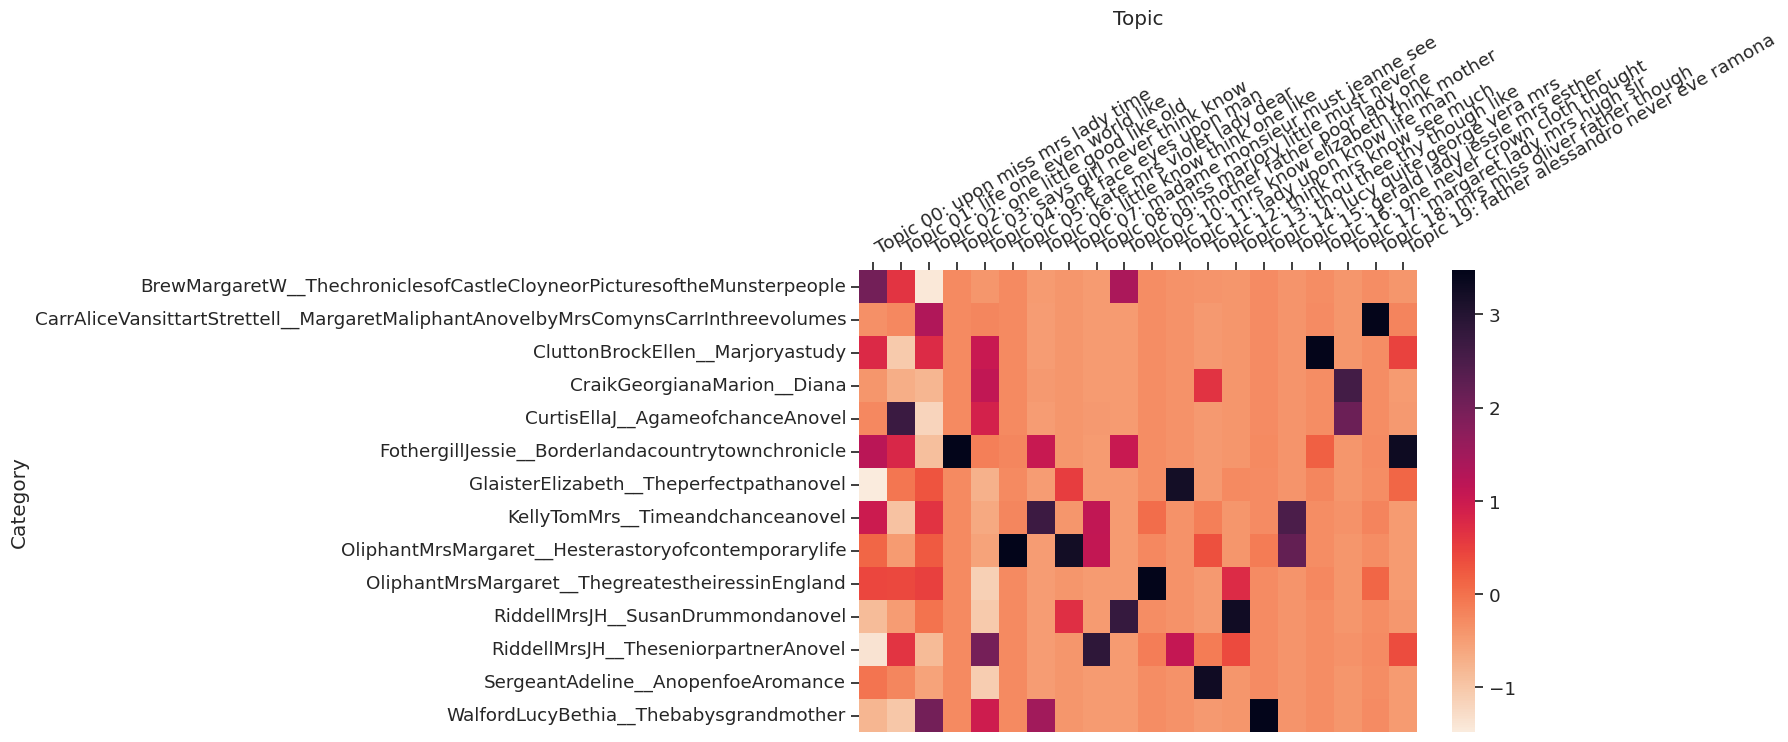

In [ ]:
output_directory_path = 'results'
Path(f"{output_directory_path}").mkdir(parents=True, exist_ok=True)
little_mallet_wrapper.plot_categories_by_topics_heatmap(novel_titles_female,
                                      topic_distributions_female,
                                      topics_female,
                                      None,
                                      target_labels=target_labels_female,
                                      dim=(9,6)
                                     )

In [ ]:
target_labels_male = random.sample(novel_titles_male, 14)

/usr/local/lib/python3.10/dist-packages/little_mallet_wrapper/little_mallet_wrapper.py:230: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


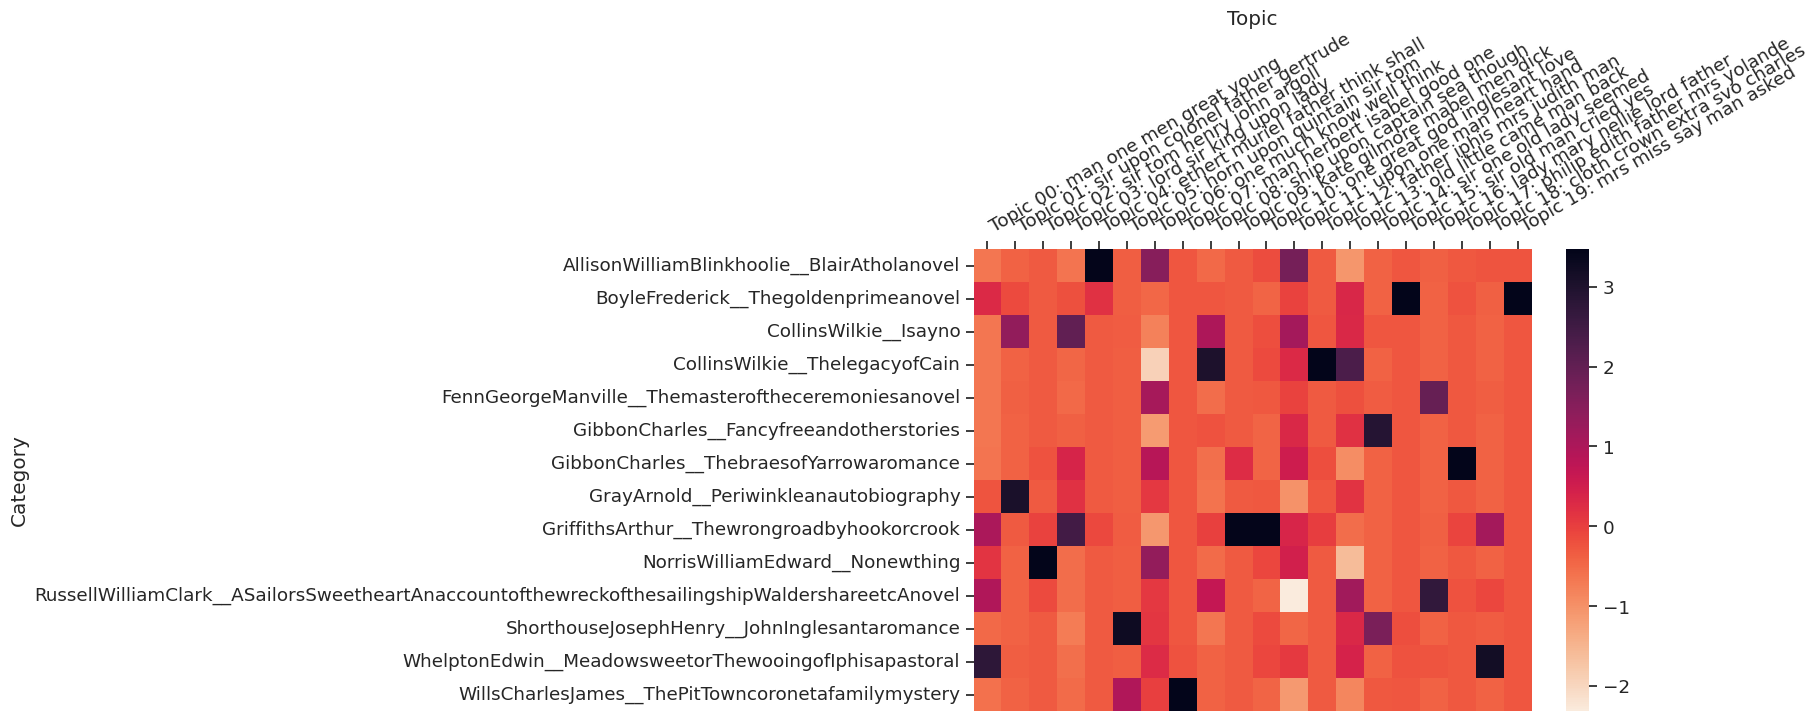

In [ ]:
output_directory_path = 'results'
Path(f"{output_directory_path}").mkdir(parents=True, exist_ok=True)
little_mallet_wrapper.plot_categories_by_topics_heatmap(novel_titles_male,
                                      topic_distributions_male,
                                      topics_male,
                                      output_directory_path + '/categories_by_topics_male.jpg',
                                      target_labels=target_labels_male,
                                      dim=(9,6)
                                     )